In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_catchments(catchments, grid):
    fig, ax = plt.subplots(figsize=(20, 10))

    grid.dissolve().plot(ax=ax, color="lightgray")
    catchments.plot(ax=ax, column="t", legend=True, cmap="cividis_r")

In [3]:
grid_cols = [
    "id",
    "geometry",
]

times = [15, 30, 45, 60]


grid = gpd.read_file("./data/grid/Helsinki_Travel_Time_Matrix_2023_grid.gpkg")[grid_cols]
grid = grid.to_crs(epsg=4326)

In [4]:
id = grid.sample().iloc[0]["id"]
print(id)

5898374


In [5]:
traveltimes = pd.read_csv(
    f"./data/matrix/Helsinki_Travel_Time_Matrix_2023/Helsinki_Travel_Time_Matrix_2023_travel_times_to_{id}.csv", sep=',', na_values=['-1']
)
interest_col = "pt_r_walk_avg"
intrest_times = traveltimes[["from_id", interest_col]]

tt_grid = grid.merge(intrest_times, left_on="id", right_on="from_id")
tt_grid = tt_grid[["geometry", interest_col]]

In [6]:
tt_grid['t'] = np.NaN

for time in reversed(times):
    mask = (tt_grid[interest_col] <= time)
    tt_grid.loc[mask, "t"] = time
clean = tt_grid.dropna()

In [7]:
catchments = clean.dissolve("t").reset_index()
catchments = catchments[["geometry", "t"]]

/home/eemil/repos/travel-time-matrix-visualisation-preprocessing/.venv/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


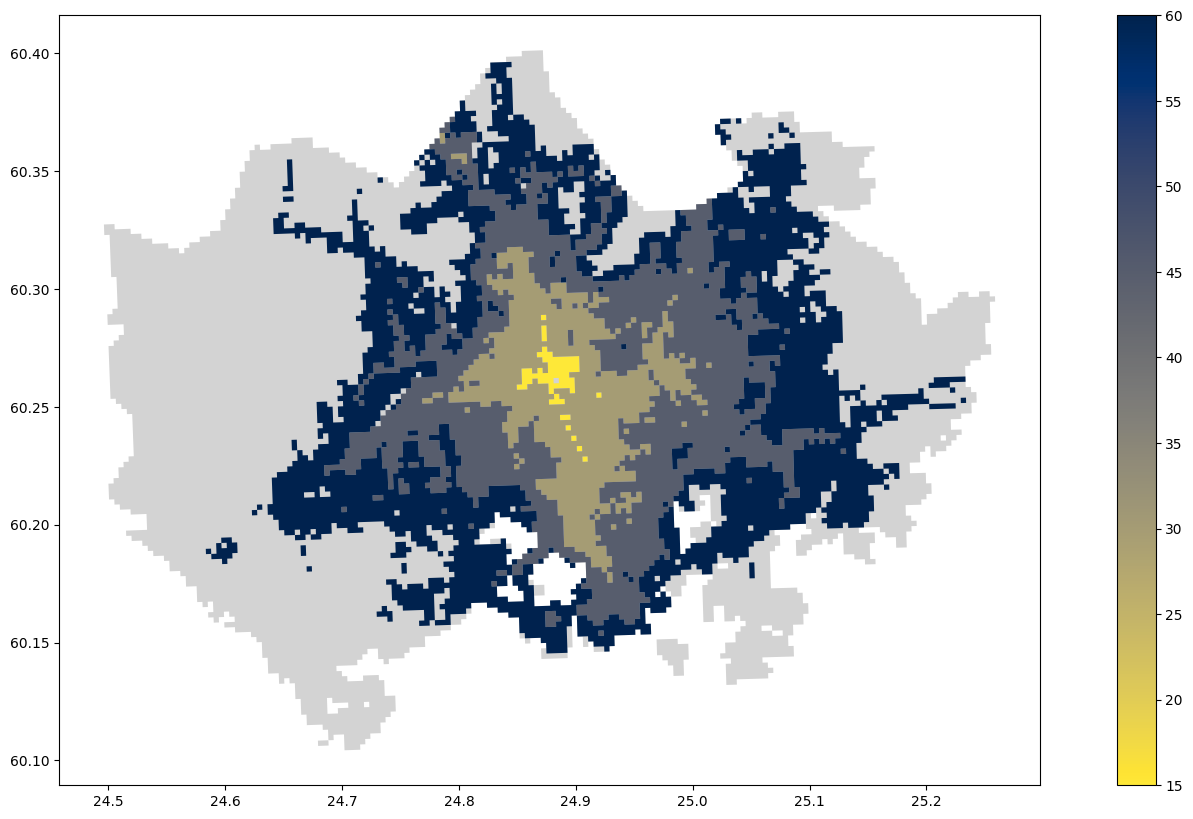

In [8]:
plot_catchments(catchments, grid)